In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


import seaborn as sns

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel('19.5 input_data.xlsx')
df.head()

,contract_num,product_name,contract_status,currency_name,duration,country,age,sex,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd,anomaly
0,ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,10,Беларусь,20,M,1096,2000000,0,12.41768,22660.000080,0.0,1
1,ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,7,Индонезия,55,M,1918,5000000,0,21.73094,56650.000199,0.0,-1
2,БАДАМСТЕ55*****,Страхование путешественников,Действует,Российский рубль,10,Беларусь,61,F,1096,2000000,0,12.41768,22660.000080,0.0,-1
3,ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,14,Грузия,25,M,1534,2000000,0,17.38022,22660.000080,0.0,1
4,ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,7,Аргентина,33,M,1918,5000000,0,21.73094,56650.000199,0.0,-1


In [5]:
df['contract_num'].nunique()

79

In [8]:
df2 = df[['product_name', 'contract_status', 'currency_name', 'sex']]
df2

,product_name,contract_status,currency_name,sex
0,Страхование путешественников,Действует,Российский рубль,M
1,Страхование путешественников,Действует,Российский рубль,M
2,Страхование путешественников,Действует,Российский рубль,F
3,Страхование путешественников,Действует,Российский рубль,M
4,Страхование путешественников,Действует,Российский рубль,M
...,...,...,...,...
3706,Страхование путешественников,Действует,Российский рубль,F
3707,Страхование путешественников,Действует,Российский рубль,M
3708,Страхование путешественников,Действует,Российский рубль,M
3709,Страхование путешественников,Действует,Российский рубль,M


In [6]:
# Кодировка категориальных признаков
ohe = OneHotEncoder(sparse=False)
ohe

OneHotEncoder(sparse=False)

In [9]:
ohe.fit(df2)

OneHotEncoder(sparse=False, sparse_output=False)

In [10]:
ohe_df1 = ohe.transform(df2)
ohe_df1

array([[1., 0., 1., ..., 1., 0., 1.],
       [1., 0., 1., ..., 1., 0., 1.],
       [1., 0., 1., ..., 1., 1., 0.],
       ...,
       [1., 0., 1., ..., 1., 0., 1.],
       [1., 0., 1., ..., 1., 0., 1.],
       [1., 0., 1., ..., 1., 0., 1.]])

In [11]:
df[ohe.get_feature_names_out()] = ohe_df1
df.head()

,contract_num,product_name,contract_status,currency_name,duration,country,age,sex,price,insurance_amount,...,loss_payout_amt_usd,anomaly,product_name_Страхование путешественников,product_name_Страхование путешественников USD,contract_status_Действует,contract_status_Завершен,currency_name_Доллар США,currency_name_Российский рубль,sex_F,sex_M
0,ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,10,Беларусь,20,M,1096,2000000,...,0.0,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,7,Индонезия,55,M,1918,5000000,...,0.0,-1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,БАДАМСТЕ55*****,Страхование путешественников,Действует,Российский рубль,10,Беларусь,61,F,1096,2000000,...,0.0,-1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,14,Грузия,25,M,1534,2000000,...,0.0,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,7,Аргентина,33,M,1918,5000000,...,0.0,-1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [12]:
columns_for_drop = ['currency_name', 'sex', 'contract_status', 'product_name']
df = df.drop(columns=columns_for_drop)
df

,contract_num,duration,country,age,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd,anomaly,product_name_Страхование путешественников,product_name_Страхование путешественников USD,contract_status_Действует,contract_status_Завершен,currency_name_Доллар США,currency_name_Российский рубль,sex_F,sex_M
0,ТТЕ7227715*****,10,Беларусь,20,1096,2000000,0,12.41768,22660.000080,0.0,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,ТТЕ7227715*****,7,Индонезия,55,1918,5000000,0,21.73094,56650.000199,0.0,-1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,БАДАМСТЕ55*****,10,Беларусь,61,1096,2000000,0,12.41768,22660.000080,0.0,-1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,ТТЕ7227715*****,14,Грузия,25,1534,2000000,0,17.38022,22660.000080,0.0,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,ТТЕ7227715*****,7,Аргентина,33,1918,5000000,0,21.73094,56650.000199,0.0,-1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,ДСЖ-5/1539*****,15,Турция,22,2466,3000000,0,27.93978,33990.000119,0.0,-1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3707,ТТЕ7227778*****,7,Индонезия,33,1918,5000000,0,21.73094,56650.000199,0.0,-1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3708,БТАСЕ275 -*****,15,Турция,43,2466,3000000,0,27.93978,33990.000119,0.0,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3709,ТТЕ7227778*****,30,Турция,29,4932,3000000,0,55.87956,33990.000119,0.0,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [13]:
df_copy = df.copy()

df_copy

,contract_num,duration,country,age,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd,anomaly,product_name_Страхование путешественников,product_name_Страхование путешественников USD,contract_status_Действует,contract_status_Завершен,currency_name_Доллар США,currency_name_Российский рубль,sex_F,sex_M
0,ТТЕ7227715*****,10,Беларусь,20,1096,2000000,0,12.41768,22660.000080,0.0,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,ТТЕ7227715*****,7,Индонезия,55,1918,5000000,0,21.73094,56650.000199,0.0,-1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,БАДАМСТЕ55*****,10,Беларусь,61,1096,2000000,0,12.41768,22660.000080,0.0,-1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,ТТЕ7227715*****,14,Грузия,25,1534,2000000,0,17.38022,22660.000080,0.0,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,ТТЕ7227715*****,7,Аргентина,33,1918,5000000,0,21.73094,56650.000199,0.0,-1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,ДСЖ-5/1539*****,15,Турция,22,2466,3000000,0,27.93978,33990.000119,0.0,-1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3707,ТТЕ7227778*****,7,Индонезия,33,1918,5000000,0,21.73094,56650.000199,0.0,-1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3708,БТАСЕ275 -*****,15,Турция,43,2466,3000000,0,27.93978,33990.000119,0.0,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3709,ТТЕ7227778*****,30,Турция,29,4932,3000000,0,55.87956,33990.000119,0.0,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [14]:
# Кодировка категориальных признаков
lab = LabelEncoder()
lab

LabelEncoder()

In [15]:
df3 = df['country']
df3

0        Беларусь
1       Индонезия
2        Беларусь
3          Грузия
4       Аргентина
          ...    
3706       Турция
3707    Индонезия
3708       Турция
3709       Турция
3710    Индонезия
Name: country, Length: 3711, dtype: object

In [16]:
lab.fit(df3)

LabelEncoder()

In [17]:
lab_df1 = lab.transform(df3)
lab_df1

array([ 3,  9,  3, ..., 17, 17,  9])

In [18]:
df['country'] = lab_df1
df.head()

,contract_num,duration,country,age,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd,anomaly,product_name_Страхование путешественников,product_name_Страхование путешественников USD,contract_status_Действует,contract_status_Завершен,currency_name_Доллар США,currency_name_Российский рубль,sex_F,sex_M
0,ТТЕ7227715*****,10,3,20,1096,2000000,0,12.41768,22660.000080,0.0,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,ТТЕ7227715*****,7,9,55,1918,5000000,0,21.73094,56650.000199,0.0,-1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,БАДАМСТЕ55*****,10,3,61,1096,2000000,0,12.41768,22660.000080,0.0,-1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,ТТЕ7227715*****,14,7,25,1534,2000000,0,17.38022,22660.000080,0.0,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,ТТЕ7227715*****,7,1,33,1918,5000000,0,21.73094,56650.000199,0.0,-1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [19]:
df4 = df['contract_num']
df4

0       ТТЕ7227715*****
1       ТТЕ7227715*****
2       БАДАМСТЕ55*****
3       ТТЕ7227715*****
4       ТТЕ7227715*****
             ...       
3706    ДСЖ-5/1539*****
3707    ТТЕ7227778*****
3708    БТАСЕ275 -*****
3709    ТТЕ7227778*****
3710    ТТЕ7227715*****
Name: contract_num, Length: 3711, dtype: object

In [20]:
lab.fit(df4)

LabelEncoder()

In [21]:
lab_df2 = lab.transform(df4)
lab_df2

array([74, 74,  3, ..., 32, 76, 74])

In [22]:
df['contract_num'] = lab_df2
df.head()

,contract_num,duration,country,age,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd,anomaly,product_name_Страхование путешественников,product_name_Страхование путешественников USD,contract_status_Действует,contract_status_Завершен,currency_name_Доллар США,currency_name_Российский рубль,sex_F,sex_M
0,74,10,3,20,1096,2000000,0,12.41768,22660.000080,0.0,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,74,7,9,55,1918,5000000,0,21.73094,56650.000199,0.0,-1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,3,10,3,61,1096,2000000,0,12.41768,22660.000080,0.0,-1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,74,14,7,25,1534,2000000,0,17.38022,22660.000080,0.0,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,74,7,1,33,1918,5000000,0,21.73094,56650.000199,0.0,-1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3711 entries, 0 to 3710
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   contract_num                                   3711 non-null   int32  
 1   duration                                       3711 non-null   int64  
 2   country                                        3711 non-null   int32  
 3   age                                            3711 non-null   int64  
 4   price                                          3711 non-null   int64  
 5   insurance_amount                               3711 non-null   int64  
 6   loss_payout_amt                                3711 non-null   int64  
 7   price_usd                                      3711 non-null   float64
 8   insurance_amount_usd                           3711 non-null   float64
 9   loss_payout_amt_usd                            3711 

In [24]:
df_categorical = df[['contract_num', 'country', 'product_name_Страхование путешественников', 'product_name_Страхование путешественников USD', 'contract_status_Действует', 'contract_status_Завершен', 'currency_name_Доллар США', 'currency_name_Российский рубль', 'sex_F', 'sex_M']]
df_categorical

,contract_num,country,product_name_Страхование путешественников,product_name_Страхование путешественников USD,contract_status_Действует,contract_status_Завершен,currency_name_Доллар США,currency_name_Российский рубль,sex_F,sex_M
0,74,3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,74,9,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,3,3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,74,7,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,74,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
3706,40,17,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3707,76,9,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3708,32,17,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3709,76,17,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [25]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3711 entries, 0 to 3710
Data columns (total 10 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   contract_num                                   3711 non-null   int32  
 1   country                                        3711 non-null   int32  
 2   product_name_Страхование путешественников      3711 non-null   float64
 3   product_name_Страхование путешественников USD  3711 non-null   float64
 4   contract_status_Действует                      3711 non-null   float64
 5   contract_status_Завершен                       3711 non-null   float64
 6   currency_name_Доллар США                       3711 non-null   float64
 7   currency_name_Российский рубль                 3711 non-null   float64
 8   sex_F                                          3711 non-null   float64
 9   sex_M                                          3711 

In [26]:
df_numerical = df[['duration', 'age', 'price', 'insurance_amount', 'loss_payout_amt', 'price_usd', 'insurance_amount_usd', 'loss_payout_amt_usd', 'anomaly']]
df_numerical

,duration,age,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd,anomaly
0,10,20,1096,2000000,0,12.41768,22660.000080,0.0,1
1,7,55,1918,5000000,0,21.73094,56650.000199,0.0,-1
2,10,61,1096,2000000,0,12.41768,22660.000080,0.0,-1
3,14,25,1534,2000000,0,17.38022,22660.000080,0.0,1
4,7,33,1918,5000000,0,21.73094,56650.000199,0.0,-1
...,...,...,...,...,...,...,...,...,...
3706,15,22,2466,3000000,0,27.93978,33990.000119,0.0,-1
3707,7,33,1918,5000000,0,21.73094,56650.000199,0.0,-1
3708,15,43,2466,3000000,0,27.93978,33990.000119,0.0,1
3709,30,29,4932,3000000,0,55.87956,33990.000119,0.0,1


In [27]:
scaler = StandardScaler()
df_ss_categorical = scaler.fit_transform(df_categorical)

In [28]:
df_ss_categorical

array([[ 1.36880853, -1.60644499,  0.18280283, ...,  0.18280283,
        -0.78548932,  0.78548932],
       [ 1.36880853, -0.537498  ,  0.18280283, ...,  0.18280283,
        -0.78548932,  0.78548932],
       [-2.32317436, -1.60644499,  0.18280283, ...,  0.18280283,
         1.27309179, -1.27309179],
       ...,
       [-0.81518135,  0.88776465,  0.18280283, ...,  0.18280283,
        -0.78548932,  0.78548932],
       [ 1.47280805,  0.88776465,  0.18280283, ...,  0.18280283,
        -0.78548932,  0.78548932],
       [ 1.36880853, -0.537498  ,  0.18280283, ...,  0.18280283,
        -0.78548932,  0.78548932]])

In [29]:
tsne = TSNE(n_components=2)
df_tsne_categorical = tsne.fit_transform(df_ss_categorical)

In [30]:
df_tsne_categorical

array([[-58.674076,  20.696417],
       [-36.49909 ,  17.548336],
       [ 10.677629,  31.777851],
       ...,
       [ 42.22196 , -30.839275],
       [-26.10114 , -81.07259 ],
       [-35.758934,  16.859968]], dtype=float32)

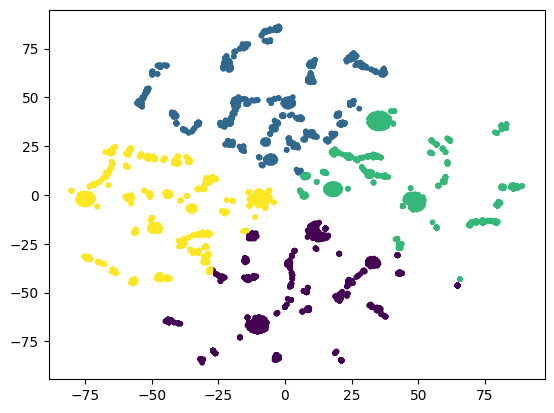

In [31]:
kmeans = KMeans(n_clusters=4).fit(df_tsne_categorical)
plt.scatter(df_tsne_categorical[:, 0], df_tsne_categorical[:, 1], s=10, c=kmeans.labels_)

In [32]:
inertia = []
silhouette = []
N = 10
for k in range(2, N):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df_ss_categorical)
    preds = kmeans.predict(df_ss_categorical)
    inertia.append(np.sqrt(kmeans.inertia_))
    silhouette.append(silhouette_score(df_ss_categorical, preds))

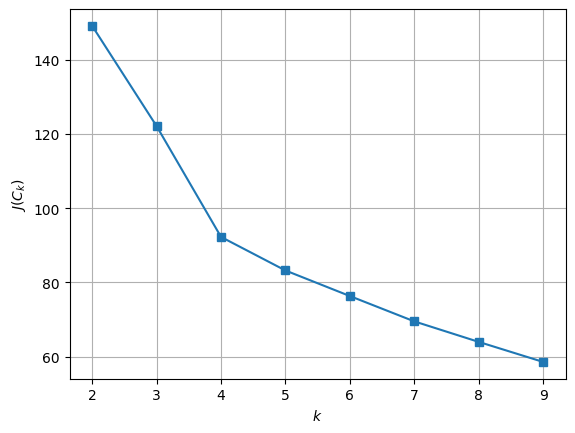

In [33]:
plt.plot(range(2, N), inertia, marker='s');
plt.xlabel('$k$')
plt.grid()
plt.ylabel('$J(C_k)$');

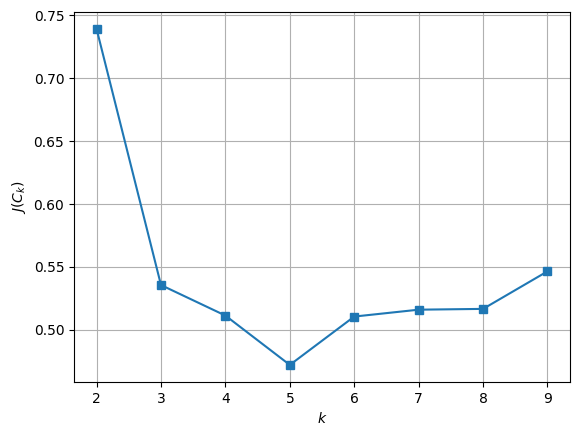

In [34]:
plt.plot(range(2, N), silhouette, marker='s');
plt.xlabel('$k$')
plt.grid()
plt.ylabel('$J(C_k)$');

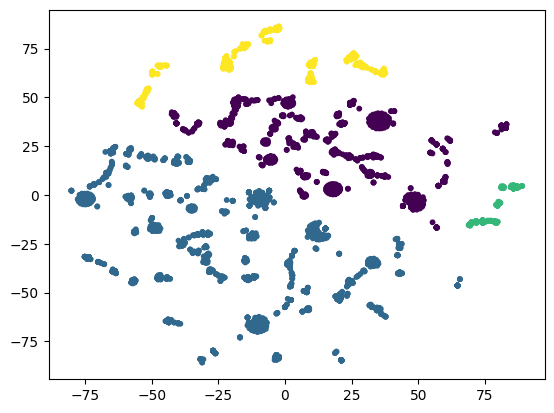

In [35]:
kmeans = KMeans(n_clusters=4).fit(df_ss_categorical)
plt.scatter(df_tsne_categorical[:, 0], df_tsne_categorical[:, 1], s=10, c=kmeans.labels_)

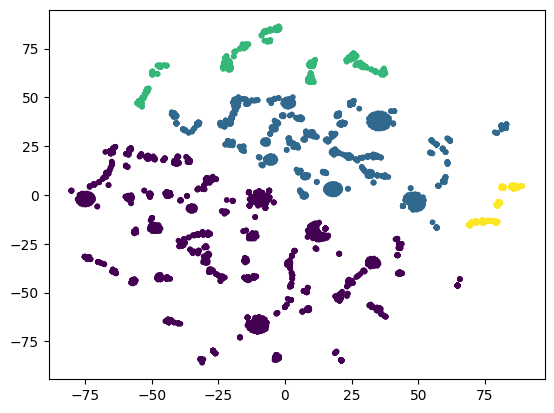

In [36]:
clustering = AgglomerativeClustering(n_clusters=4).fit(df_ss_categorical)
plt.scatter(df_tsne_categorical[:, 0], df_tsne_categorical[:, 1], s=10, c=clustering.labels_)

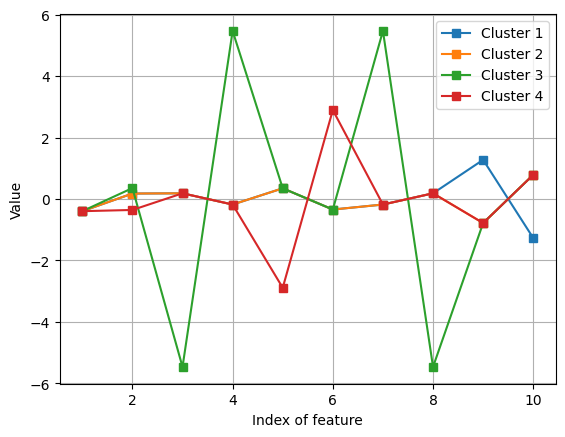

In [37]:
plt.plot(range(1, df_ss_categorical.shape[1]+1), np.median(df_ss_categorical[kmeans.labels_ == 0], axis=0), marker='s', label="Cluster 1");
plt.plot(range(1, df_ss_categorical.shape[1]+1), np.median(df_ss_categorical[kmeans.labels_ == 1], axis=0), marker='s', label="Cluster 2");
plt.plot(range(1, df_ss_categorical.shape[1]+1), np.median(df_ss_categorical[kmeans.labels_ == 2], axis=0), marker='s', label="Cluster 3");
plt.plot(range(1, df_ss_categorical.shape[1]+1), np.median(df_ss_categorical[kmeans.labels_ == 3], axis=0), marker='s', label="Cluster 4");

plt.legend()
plt.xlabel('Index of feature')
plt.grid()
plt.ylabel('Value');

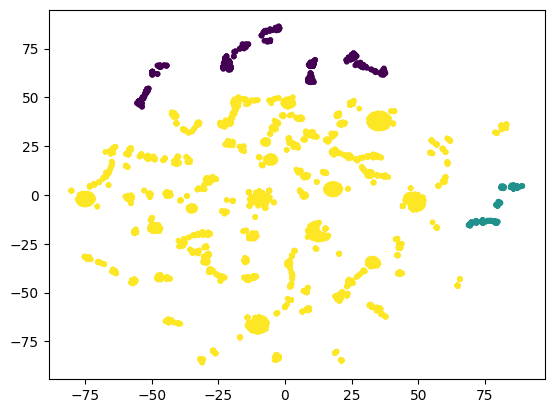

In [38]:
kmeans = KMeans(n_clusters=3).fit(df_ss_categorical)
plt.scatter(df_tsne_categorical[:, 0], df_tsne_categorical[:, 1], s=10, c=kmeans.labels_)

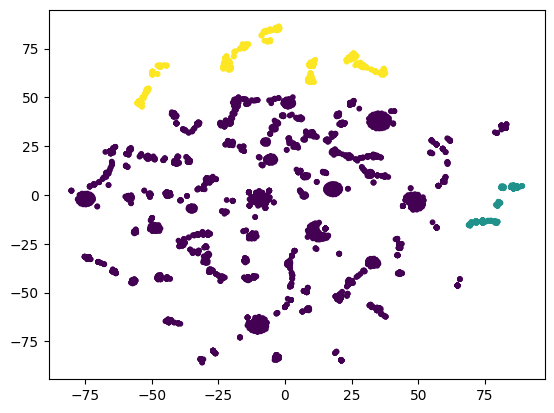

In [39]:
clustering = AgglomerativeClustering(n_clusters=3).fit(df_ss_categorical)
plt.scatter(df_tsne_categorical[:, 0], df_tsne_categorical[:, 1], s=10, c=clustering.labels_)

In [40]:
scaler = StandardScaler()
df_ss_numerical = scaler.fit_transform(df_numerical)

In [41]:
tsne = TSNE(n_components=2)
df_tsne_numerical = tsne.fit_transform(df_ss_numerical)

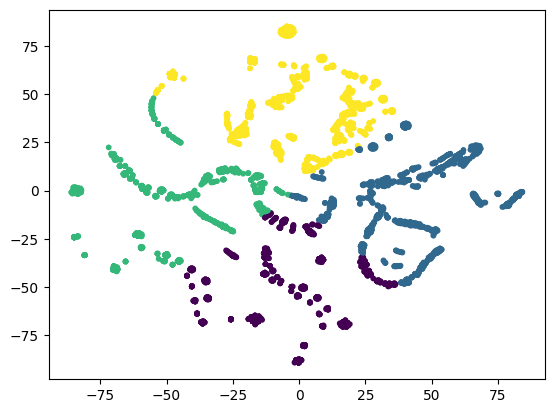

In [42]:
kmeans1 = KMeans(n_clusters=4).fit(df_tsne_numerical)
plt.scatter(df_tsne_numerical[:, 0], df_tsne_numerical[:, 1], s=10, c=kmeans1.labels_)

In [43]:
inertia1 = []
silhouette1 = []
N1 = 10
for k1 in range(2, N1):
    kmeans1 = KMeans(n_clusters=k1, random_state=1).fit(df_ss_numerical)
    preds1 = kmeans1.predict(df_ss_numerical)
    inertia1.append(np.sqrt(kmeans1.inertia_))
    silhouette1.append(silhouette_score(df_ss_numerical, preds1))

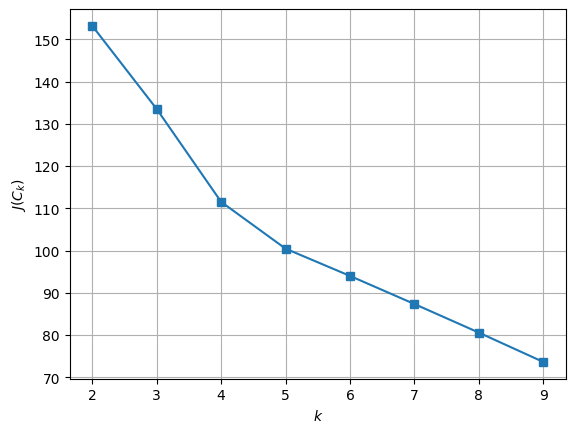

In [44]:
plt.plot(range(2, N1), inertia1, marker='s');
plt.xlabel('$k$')
plt.grid()
plt.ylabel('$J(C_k)$');

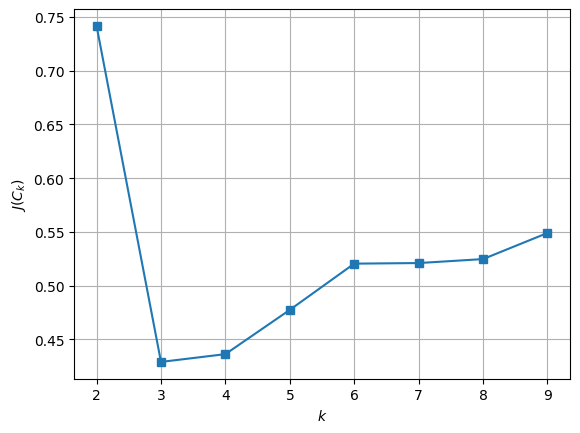

In [45]:
plt.plot(range(2, N1), silhouette1, marker='s');
plt.xlabel('$k$')
plt.grid()
plt.ylabel('$J(C_k)$');

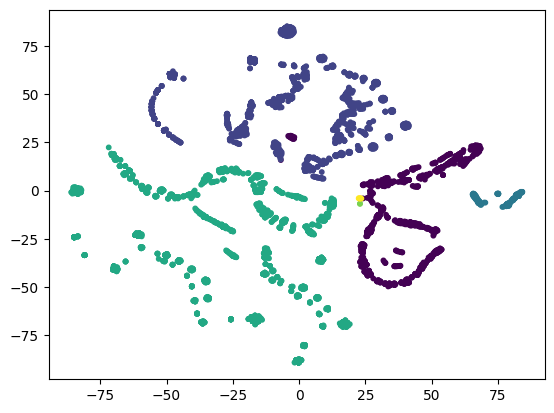

In [46]:
kmeans1 = KMeans(n_clusters=6).fit(df_ss_numerical)
plt.scatter(df_tsne_numerical[:, 0], df_tsne_numerical[:, 1], s=10, c=kmeans1.labels_)

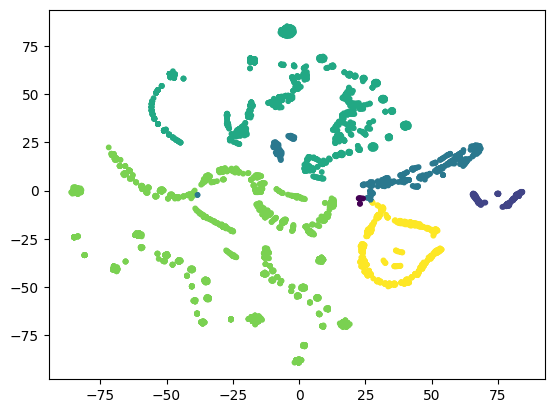

In [47]:
clustering1 = AgglomerativeClustering(n_clusters=6).fit(df_ss_numerical)
plt.scatter(df_tsne_numerical[:, 0], df_tsne_numerical[:, 1], s=10, c=clustering1.labels_)

In [48]:

from sklearn.inspection import permutation_importance

# Оценка важности признаков с помощью перестановочной важности
result = permutation_importance(kmeans, df_categorical, np.zeros(df_categorical.shape[0]), n_repeats=10, random_state=42)

# Вывод важности признаков
importances = result.importances_mean
indices = np.argsort(importances)[::-1]
for f in range(df_categorical.shape[1]):
    print(f"Признак {f+1}: {importances[indices[f]]}")

Признак 1: 423.7247338924557
Признак 2: 414.9985916428268
Признак 3: 414.9985916428268
Признак 4: 157.4867082314566
Признак 5: 0.09828592743724585
Признак 6: 0.09828592743724585
Признак 7: 1.3038516044616698e-09
Признак 8: 1.3038516044616698e-09
Признак 9: 1.3038516044616698e-09
Признак 10: 1.3038516044616698e-09


In [49]:
# Оценка важности признаков с помощью перестановочной важности
result = permutation_importance(kmeans1, df_numerical, np.zeros(df_numerical.shape[0]), n_repeats=10, random_state=42)

# Вывод важности признаков
importances = result.importances_mean
indices = np.argsort(importances)[::-1]
for f in range(df_numerical.shape[1]):
    print(f"Признак {f+1}: {importances[indices[f]]}")

Признак 1: 8.0
Признак 2: 4.8
Признак 3: 0.8
Признак 4: -1.6
Признак 5: -4198.4
Признак 6: -55017.6
Признак 7: -619272.0
Признак 8: -830613.6
Признак 9: -970524.8


In [50]:
# убираем выбросы из датафрейма
df11 = df_copy[df_copy['anomaly']  < 0]
df11

,contract_num,duration,country,age,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd,anomaly,product_name_Страхование путешественников,product_name_Страхование путешественников USD,contract_status_Действует,contract_status_Завершен,currency_name_Доллар США,currency_name_Российский рубль,sex_F,sex_M
1,ТТЕ7227715*****,7,Индонезия,55,1918,5000000,0,21.73094,56650.000199,0.0,-1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,БАДАМСТЕ55*****,10,Беларусь,61,1096,2000000,0,12.41768,22660.000080,0.0,-1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,ТТЕ7227715*****,7,Аргентина,33,1918,5000000,0,21.73094,56650.000199,0.0,-1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
6,ТТЕ7227715*****,30,Турция,38,4932,3000000,0,55.87956,33990.000119,0.0,-1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
8,БАУБМСТЕ37*****,30,Турция,41,4932,3000000,0,55.87956,33990.000119,0.0,-1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3686,БАФАМПТЕ57*****,14,Турция,25,2301,3000000,0,26.07033,33990.000119,0.0,-1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3699,БАЖАМСТЕ55*****,10,Беларусь,45,1096,2000000,0,12.41768,22660.000080,0.0,-1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3701,ТТЕ7227715*****,7,Индонезия,55,1918,5000000,0,21.73094,56650.000199,0.0,-1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3706,ДСЖ-5/1539*****,15,Турция,22,2466,3000000,0,27.93978,33990.000119,0.0,-1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [51]:
df11.groupby(["contract_num", "country", "duration", "age"]).sum("loss_payout_amt_usd").sort_values(["loss_payout_amt_usd"], ascending=False).head(10)

price  insurance_amount  \
contract_num    country   duration age                            
ДСЖ-5/1539***** США       12       34      33             50000   
ТБАТМСЛЕ47***** США       14       45      77            100000   
ДСЖ-5/1539***** Германия  14       27    3836           5000000   
                Турция    365      61   60000           3000000   
ТТЕ7227715***** Таиланд   7        27    1918           5000000   
ДСЖ-5/1539***** Таиланд   28       67   15342          10000000   
ТТЕ7227715***** Аргентина 7        61    1918           5000000   
                Турция    16       67    2630           3000000   
ДСЖ-5/1539***** Индонезия 7        53    1918           5000000   
ТТЕ7227715***** Турция    10       61    1644           3000000   

                                        loss_payout_amt   price_usd  \
contract_num    country   duration age                                
ДСЖ-5/1539***** США       12       34             30000   33.000000   
ТБАТМСЛЕ47***** США       14       45             20000   77.000000   
ДСЖ-5/1539***** Германия  14       27            500000   43.461880   
                Турция    365      61            300000  679.800002   
ТТЕ7227715***** Таиланд   7        27            250000   21.730940   
ДСЖ-5/1539***** Таиланд   28       67            200000  173.824861   
ТТЕ7227715***** Аргентина 7        61            200000   21.730940   
                Турция    16       67            150000   29.797900   
ДСЖ-5/1539***** Индонезия 7        53            150000   21.730940   
ТТЕ7227715***** Турция    10       61            100000   18.626520   

                                        insurance_amount_usd  \
contract_num    country   duration age                         
ДСЖ-5/1539***** США       12       34           50000.000000   
ТБАТМСЛЕ47***** США       14       45          100000.000000   
ДСЖ-5/1539***** Германия  14       27           56650.000199   
                Турция    365      61           33990.000119   
ТТЕ7227715***** Таиланд   7        27           56650.000199   
ДСЖ-5/1539***** Таиланд   28       67          113300.000398   
ТТЕ7227715***** Аргентина 7        61           56650.000199   
                Турция    16       67           33990.000119   
ДСЖ-5/1539***** Индонезия 7        53           56650.000199   
ТТЕ7227715***** Турция    10       61           33990.000119   

                                        loss_payout_amt_usd  anomaly  \
contract_num    country   duration age                                 
ДСЖ-5/1539***** США       12       34          30000.000000       -1   
ТБАТМСЛЕ47***** США       14       45          20000.000000       -1   
ДСЖ-5/1539***** Германия  14       27           5665.000020       -1   
                Турция    365      61           3399.000012       -1   
ТТЕ7227715***** Таиланд   7        27           2832.500010       -1   
ДСЖ-5/1539***** Таиланд   28       67           2266.000008       -2   
ТТЕ7227715***** Аргентина 7        61           2266.000008       -1   
                Турция    16       67           1699.500006       -1   
ДСЖ-5/1539***** Индонезия 7        53           1699.500006       -1   
ТТЕ7227715***** Турция    10       61           1133.000004       -1   

                                        product_name_Страхование путешественников  \
contract_num    country   duration age                                              
ДСЖ-5/1539***** США       12       34                                         0.0   
ТБАТМСЛЕ47***** США       14       45                                         0.0   
ДСЖ-5/1539***** Германия  14       27                                         1.0   
                Турция    365      61                                         1.0   
ТТЕ7227715***** Таиланд   7        27                                         1.0   
ДСЖ-5/1539***** Таиланд   28       67                                         2.0   
ТТЕ7227715***** Аргентина 7        61                               

In [52]:
df_copy.groupby(["contract_num", "country", "duration", "age"]).sum("loss_payout_amt_usd").sort_values(["loss_payout_amt_usd"], ascending=False).head(10)

price  insurance_amount  \
contract_num    country        duration age                            
ДСЖ-5/1539***** США            12       34      33             50000   
ТБАТМСЛЕ47***** США            14       45      77            100000   
ДСЖ-5/1539***** ОАЭ            25       82    6849           5000000   
                Франция        14       65    3836           5000000   
                Великобритания 14       65    3836           5000000   
БАЕАМСТЕ35***** Германия       24       21    6575           5000000   
ДСЖ-5/1539***** Канада         14       57    3836           5000000   
ТТЕ7227715***** Германия       14       53    3836           5000000   
ДСЖ-5/1539***** Германия       14       27    3836           5000000   
                Турция         365      61   60000           3000000   

                                             loss_payout_amt   price_usd  \
contract_num    country        duration age                                
ДСЖ-5/1539***** США            12       34             30000   33.000000   
ТБАТМСЛЕ47***** США            14       45             20000   77.000000   
ДСЖ-5/1539***** ОАЭ            25       82           1500000   77.599170   
                Франция        14       65           1300000   43.461880   
                Великобритания 14       65           1000000   43.461880   
БАЕАМСТЕ35***** Германия       24       21           1000000   74.494750   
ДСЖ-5/1539***** Канада         14       57            800000   43.461880   
ТТЕ7227715***** Германия       14       53            700000   43.461880   
ДСЖ-5/1539***** Германия       14       27            500000   43.461880   
                Турция         365      61            300000  679.800002   

                                             insurance_amount_usd  \
contract_num    country        duration age                         
ДСЖ-5/1539***** США            12       34           50000.000000   
ТБАТМСЛЕ47***** США            14       45          100000.000000   
ДСЖ-5/1539***** ОАЭ            25       82           56650.000199   
                Франция        14       65           56650.000199   
                Великобритания 14       65           56650.000199   
БАЕАМСТЕ35***** Германия       24       21           56650.000199   
ДСЖ-5/1539***** Канада         14       57           56650.000199   
ТТЕ7227715***** Германия       14       53           56650.000199   
ДСЖ-5/1539***** Германия       14       27           56650.000199   
                Турция         365      61           33990.000119   

                                             loss_payout_amt_usd  anomaly  \
contract_num    country        duration age                                 
ДСЖ-5/1539***** США            12       34          30000.000000       -1   
ТБАТМСЛЕ47***** США            14       45          20000.000000       -1   
ДСЖ-5/1539***** ОАЭ            25       82          16995.000060        1   
                Франция        14       65          14729.000052        1   
                Великобритания 14       65          11330.000040        1   
БАЕАМСТЕ35***** Германия       24       21          11330.000040        1   
ДСЖ-5/1539***** Канада         14       57           9064.000032        1   
ТТЕ7227715***** Германия       14       53           7931.000028        1   
ДСЖ-5/1539***** Германия       14       27           5665.000020       -1   
                Турция         365      61           3399.000012       -1   

                                             product_name_Страхование путешественников  \
contract_num    country        duration age                                              
ДСЖ-5/1539***** США            12       34                                         0.0   
ТБАТМСЛЕ47***** США            14       45                                         0.0   
ДСЖ-5/1539***** ОАЭ            25       82                                         1.0   
                Франция        14       65                     

# в датафрейме показаны страны проживания , длительность страховки и возраст,  которые больше всего влияют на убыток по страховке. При заключении страховки эти группы нужно старатся избегать.